# Grid Search y Random Search: Métodos de búsqueda de hiperparámetros


### Grid search 
Es una búsqueda exhaustiva donde se prueban todas las combinaciones posibles de hiperparámetros en una grilla definida.

Ventajas:
- Encuentra la mejor combinación dentro del conjunto de hiperparámetros definido.
- Es reproducible y garantiza la mejor solución dentro de la grilla.

Desventajas:
- Muy costoso computacionalmente si hay muchos hiperparámetros y valores posibles.
- No explora valores fuera de la grilla definida.


### RandomSearch 

En lugar de probar todas las combinaciones, selecciona valores aleatorios dentro de un rango predefinido.

Ventajas:
- Más rápido que Grid Search.
- Permite explorar un espacio más amplio de hiperparámetros.

Desventajas:
- No garantiza encontrar la mejor combinación absoluta, pero sí una buena solución en menos tiempo.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

# --- Limpieza de datos ---
df = pd.read_csv('titanic.csv')
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df = pd.get_dummies(df)
del df['Sex_female']
df['Age'] = df['Age'].fillna(df.Age.mean())

# Variables predictoras y objetivo
X = df.drop('Survived', axis=1)
y = df['Survived']

# --- División en conjunto de entrenamiento y test (80%-20%) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### KNN

In [59]:
# Definir pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalización de datos
    ('knn', KNeighborsClassifier())  
])

params_grid = {
    'knn__n_neighbors': range(1, 30), 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan'] 
}

In [60]:
grid_search= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'knn__metric': ['euclidean', 'manhattan'],
                         'knn__n_neighbors': range(1, 30),
                         'knn__weights': ['uniform', 'distance']},
             scoring='roc_auc')

GridSearch

In [61]:
# Configurar GridSearchCV, estimator, params_grid, cv, n_jobs, scoring
grid_search.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 16, 'knn__weights': 'uniform'}

In [62]:
prob_knn_grid= grid_search.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_true=y_test, y_score=prob_knn_grid)

np.float64(0.8730418316405577)

In [63]:
grid_search.cv_results_

{'mean_fit_time': array([0.00717378, 0.00790405, 0.00633006, 0.00684261, 0.00745955,
        0.00808129, 0.00612254, 0.00509195, 0.00735683, 0.00778804,
        0.00753994, 0.00986414, 0.00766149, 0.00812101, 0.00752006,
        0.00803881, 0.00922871, 0.00723605, 0.00722194, 0.00850592,
        0.00789738, 0.00916166, 0.00834284, 0.00791221, 0.00839224,
        0.00849767, 0.00773139, 0.00979519, 0.00743032, 0.00769925,
        0.00814986, 0.00667834, 0.00601091, 0.00795898, 0.00816708,
        0.00748992, 0.00740013, 0.00811191, 0.00857086, 0.00798888,
        0.0083128 , 0.00955768, 0.00875883, 0.00782409, 0.00907893,
        0.00946712, 0.0081574 , 0.00854044, 0.00794363, 0.00822606,
        0.00814509, 0.00931854, 0.00794973, 0.00904346, 0.00895662,
        0.0088336 , 0.00749745, 0.00806732, 0.00912781, 0.00797753,
        0.00948524, 0.00914388, 0.0084198 , 0.00853186, 0.00844064,
        0.00797825, 0.00675721, 0.00804076, 0.00915089, 0.00803251,
        0.00644207, 0.00913005,

Random Search

In [64]:
# Random search, estimator, params_dist, n_iter, cv, n_jobs
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('knn', KNeighborsClassifier())]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'knn__metric': ['euclidean',
                                                        'manhattan'],
                                        'knn__n_neighbors': range(1, 30),
                                        'knn__weights': ['uniform',
                                                         'distance']},
                   scoring='roc_auc')

In [65]:
random_search.best_params_

{'knn__weights': 'uniform', 'knn__n_neighbors': 21, 'knn__metric': 'manhattan'}

In [66]:
random_knn= random_search.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_score= random_knn, y_true=y_test)

np.float64(0.8685947093590405)

### Regresion logistica

In [67]:
# Pipeline 
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),  # grado se definirá en grid search
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=10000, random_state=42))
])
pipeline


Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(max_iter=10000, random_state=42))])

In [68]:
# Grid Search 
# Parametros a buscar, polinomial degree, logistic regression C 
params_grid= {
    'poly__degree': [1, 2, 3],
    'logreg__C': ['l2', None],
    'logreg__C': [0.01,0.1,1]
}

log_reg_grid= GridSearchCV(estimator=pipeline, param_grid=params_grid, cv=5, n_jobs=-1, scoring='roc_auc')
log_reg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'logreg__C': [0.01, 0.1, 1],
                         'poly__degree': [1, 2, 3]},
             scoring='roc_auc')

In [69]:
log_reg_grid.best_params_

{'logreg__C': 0.1, 'poly__degree': 2}

In [70]:
probabilities_log_reg_grid = log_reg_grid.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_score=probabilities_log_reg_grid, y_true=y_test)

np.float64(0.8820221495380731)

In [71]:
# Random search
log_reg_random= RandomizedSearchCV(estimator=pipeline, param_distributions=params_grid, n_iter=15, cv=5, n_jobs=-1, scoring='roc_auc')

log_reg_random.fit(X_train, y_train)


c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 9 is smaller than n_iter=15. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('poly',
                                              PolynomialFeatures(include_bias=False)),
                                             ('scaler', StandardScaler()),
                                             ('logreg',
                                              LogisticRegression(max_iter=10000,
                                                                 random_state=42))]),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'logreg__C': [0.01, 0.1, 1],
                                        'poly__degree': [1, 2, 3]},
                   scoring='roc_auc')

In [72]:
log_reg_random.best_params_

{'poly__degree': 2, 'logreg__C': 0.1}

In [73]:
probabilities_log_reg_random= log_reg_random.best_estimator_.predict_proba(X_test)[:,1]
roc_auc_score(y_score=probabilities_log_reg_random, y_true=y_test)

np.float64(0.8820221495380731)

## AUC continuación

Ejemplo, crédito:

Si tomas al azar una persona que si pago y una persona que no pago

El AUC es la probabilidad de que la persona que si pago tenga una predicción mayor


In [74]:
### AUC 
df_auc= pd.DataFrame({
    'probabilidades': probabilities_log_reg_random,
    'y_true': y_test
})



In [75]:
resultado= []
for i in range(10000):
    muestra_sobrevive= df_auc.query("y_true == 1").sample()['probabilidades'].values[0]
    muestra_muere= df_auc.query("y_true == 0").sample()['probabilidades'].values[0]
    resultado.append(muestra_sobrevive > muestra_muere)

In [76]:
np.mean(resultado)

np.float64(0.8822)

### Intervalo de confianza

In [77]:
auc_bootstrap= []

for i in range(1000):
    flag_fame = df_auc.sample(len(df_auc), replace=True)
    auc_bootstrap.append(roc_auc_score(y_score=flag_fame['probabilidades'], y_true=flag_fame['y_true']))

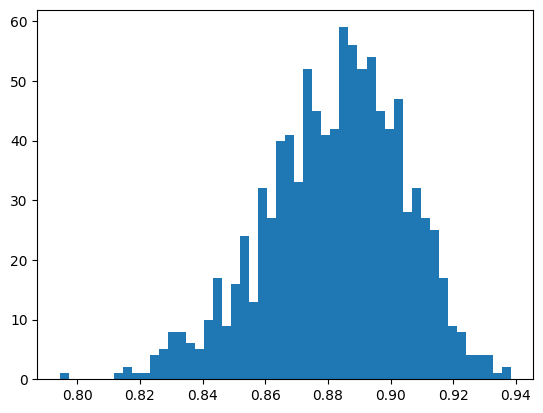

In [78]:
plt.hist(auc_bootstrap, bins=50)
plt.show()

In [79]:
df_auc_booststrap= pd.DataFrame({
    'auc': auc_bootstrap 
    })
(df_auc_booststrap.auc > 0.9).mean()

np.float64(0.218)

### Intervalo de confianza AUC 95%

In [82]:
# 1 --> Obtenemos el error estandard
se_auc= np.std(auc_bootstrap)

In [84]:
np.mean(auc_bootstrap) - 1.96*se_auc

np.float64(0.8388477450444355)

In [85]:
np.mean(auc_bootstrap) + 1.96*se_auc

np.float64(0.9257325265370598)

### Regresión logistica con pesos 

Ejemplo, darle más peso a las personas más jovenes

In [86]:
model= LogisticRegression().fit(X_train, y_train)
prediccion_normal= model.predict_proba(X_test)[:,1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [87]:
weights= 1 / X_train['Age']

In [88]:
model_weighted= LogisticRegression().fit(X_train, y_train, sample_weight=weights)
prediccion_weighted= model_weighted.predict_proba(X_test)[:,1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
df_weighted= pd.DataFrame({
    'age': X_test['Age'],
    'y_test': y_test,
    'prediccion_normal': prediccion_normal,
    'prediccion_weighted': prediccion_weighted
})
df_weighted

,age,y_test,prediccion_normal,prediccion_weighted
709,29.699118,1,0.158937,0.301944
439,31.000000,0,0.209124,0.341764
840,20.000000,0,0.135944,0.358935
720,6.000000,1,0.857671,0.915058
39,14.000000,1,0.781834,0.699321
...,...,...,...,...
821,27.000000,1,0.112955,0.238105
633,29.699118,0,0.384221,0.581270
456,65.000000,0,0.186083,0.064230
500,17.000000,0,0.147310,0.417475
